### How is Hotel's price in Berlin?
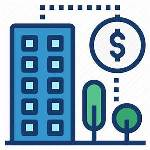

Customer satisfaction will be examined at Blaine,Germany Hotels and what are the interesting items at the room price. 

**Info Data File**

**Data From** http://insideairbnb.com/get-the-data.html

**File Name** listings.csv **rename to** Berlin_Germany_Listings.csv

**Date Compiled** 13-10-2020

### Business Understanding

Question 1:- If more we go north, the lower price?

Question 2:- What is expected the price for most commonly used in the far south for every room type?

Question 3:- Increasing the number of days available per year causes price increases ?

Question 4:- when minimum nights is small then the price increases?

### Data Understanding

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)

df_main = pd.read_csv('./Berlin_Germany_Listings.csv')

### we will work with CRISP-DM Process (Cross Industry Process for Data Mining)
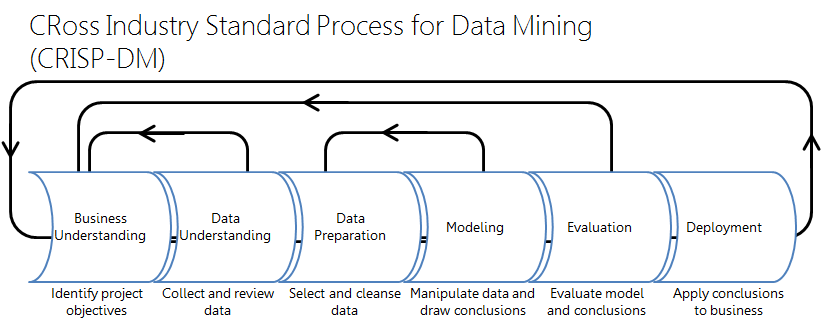

### Data Preparation

In [45]:
df_main.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,61,5,134,2020-09-26,2.43,6,180
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,146,2020-05-27,1.06,1,353
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.31,1,293
3,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.15,1,0
4,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.13,1,29


In [46]:
df_main.shape

(20227, 16)

In [47]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20227 entries, 0 to 20226
Data columns (total 16 columns):
id                                20227 non-null int64
name                              20195 non-null object
host_id                           20227 non-null int64
host_name                         20215 non-null object
neighbourhood_group               20227 non-null object
neighbourhood                     20227 non-null object
latitude                          20227 non-null float64
longitude                         20227 non-null float64
room_type                         20227 non-null object
price                             20227 non-null int64
minimum_nights                    20227 non-null int64
number_of_reviews                 20227 non-null int64
last_review                       16460 non-null object
reviews_per_month                 16460 non-null float64
calculated_host_listings_count    20227 non-null int64
availability_365                  20227 non-null int64

In [48]:
df_main.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,2.022700e+04,20195,2.022700e+04,20215,20227,20227,20227.000000,20227.000000,20227,20227.000000,20227.000000,20227.000000,16460,16460.000000,20227.000000,20227.000000
unique,NaN,19655,NaN,5541,12,138,NaN,NaN,4,NaN,NaN,NaN,1843,NaN,NaN,NaN
top,NaN,40% off budget room with private shower,NaN,Anna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2020-10-04,NaN,NaN,NaN
freq,NaN,11,NaN,152,4602,1142,NaN,NaN,10971,NaN,NaN,NaN,251,NaN,NaN,NaN
mean,2.361542e+07,NaN,8.551713e+07,NaN,NaN,NaN,52.510246,13.404865,NaN,67.815939,7.990063,23.140258,NaN,0.843584,2.823108,87.639294
std,1.372947e+07,NaN,9.821869e+07,NaN,NaN,NaN,0.031903,0.062069,NaN,114.235766,30.525101,48.747977,NaN,1.218423,6.521288,128.382964
min,2.015000e+03,NaN,1.581000e+03,NaN,NaN,NaN,52.340410,13.098390,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.181564e+07,NaN,1.079583e+07,NaN,NaN,NaN,52.489590,13.369115,NaN,35.000000,2.000000,1.000000,NaN,0.120000,1.000000,0.000000
50%,2.267455e+07,NaN,4.129505e+07,NaN,NaN,NaN,52.510130,13.414540,NaN,50.000000,3.000000,5.000000,NaN,0.360000,1.000000,0.000000
75%,3.633792e+07,NaN,1.320462e+08,NaN,NaN,NaN,52.533000,13.439005,NaN,79.000000,4.000000,20.000000,NaN,1.010000,2.000000,158.000000


### Data Modeling

##### select only data like the Questions and drop other columns

In [49]:
#Only use quant variables  
df=df_main.drop(['name' , 'host_id' , 'host_name', 'neighbourhood_group','neighbourhood','longitude','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count'], axis=1)

##### drop rows is  null values  
Drop null values to get more real data

In [50]:
#drop any rows with missing values
df=df.dropna()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20227 entries, 0 to 20226
Data columns (total 6 columns):
id                  20227 non-null int64
latitude            20227 non-null float64
room_type           20227 non-null object
price               20227 non-null int64
minimum_nights      20227 non-null int64
availability_365    20227 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.1+ MB


In [52]:
df.describe(include='all')

,id,latitude,room_type,price,minimum_nights,availability_365
count,2.022700e+04,20227.000000,20227,20227.000000,20227.000000,20227.000000
unique,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,Entire home/apt,NaN,NaN,NaN
freq,NaN,NaN,10971,NaN,NaN,NaN
mean,2.361542e+07,52.510246,NaN,67.815939,7.990063,87.639294
std,1.372947e+07,0.031903,NaN,114.235766,30.525101,128.382964
min,2.015000e+03,52.340410,NaN,0.000000,1.000000,0.000000
25%,1.181564e+07,52.489590,NaN,35.000000,2.000000,0.000000
50%,2.267455e+07,52.510130,NaN,50.000000,3.000000,0.000000
75%,3.633792e+07,52.533000,NaN,79.000000,4.000000,158.000000


In [53]:
df.groupby(['room_type']).count()

,id,latitude,price,minimum_nights,availability_365
room_type,,,,,
Entire home/apt,10971,10971,10971,10971,10971
Hotel room,230,230,230,230,230
Private room,8747,8747,8747,8747,8747
Shared room,279,279,279,279,279


In [54]:
#Fix values room type to convert to feild name
df['room_type']=df['room_type'].str.replace(' ','_')

In [55]:
df['room_type'].replace('Entire_home/apt','Entire_home',inplace=True)

In [56]:
df.groupby(['room_type']).count()

,id,latitude,price,minimum_nights,availability_365
room_type,,,,,
Entire_home,10971,10971,10971,10971,10971
Hotel_room,230,230,230,230,230
Private_room,8747,8747,8747,8747,8747
Shared_room,279,279,279,279,279


Convert room type to columns

First, complete the create_dummy_df. Follow the instructions in the document string to assist as necessary.

Add null value to get hight Model

In [57]:
def create_dummy_df(df, cat_cols, drop_first,dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    drop_first - Bool holding whether you want to contains frist value is list or not
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if drop_first is False - it also contains frist value is list
            5. if dummy_na is True - it also contains dummy columns for the NaN values
            6. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=drop_first, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [58]:
#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df = create_dummy_df(df, cat_cols_lst,drop_first=False ,dummy_na=True) #Use your newly created function

# Show a header of df_new to check
print(df.shape)
 

(20227, 10)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20227 entries, 0 to 20226
Data columns (total 10 columns):
id                        20227 non-null int64
latitude                  20227 non-null float64
price                     20227 non-null int64
minimum_nights            20227 non-null int64
availability_365          20227 non-null int64
room_type_Entire_home     20227 non-null uint8
room_type_Hotel_room      20227 non-null uint8
room_type_Private_room    20227 non-null uint8
room_type_Shared_room     20227 non-null uint8
room_type_nan             20227 non-null uint8
dtypes: float64(1), int64(4), uint8(5)
memory usage: 1.0 MB


In [60]:
# Update decimal for latitude
df['latitude']=(df['latitude']-52)*100

In [61]:
df['latitude'].head()

0    53.454
1    53.500
2    49.885
3    54.316
4    53.303
Name: latitude, dtype: float64

In [62]:
# convert latitude to int
df=df.astype(int)

In [63]:
df.head()

,id,latitude,price,minimum_nights,availability_365,room_type_Entire_home,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,room_type_nan
0,2015,53,61,5,180,1,0,0,0,0
1,3176,53,90,62,353,1,0,0,0,0
2,3309,49,29,7,293,0,0,1,0,0
3,7071,54,33,1,0,0,0,1,0,0
4,9991,53,180,6,29,1,0,0,0,0


In [64]:
df['latitude'].head()

0    53
1    53
2    49
3    54
4    53
Name: latitude, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20227 entries, 0 to 20226
Data columns (total 10 columns):
id                        20227 non-null int64
latitude                  20227 non-null int64
price                     20227 non-null int64
minimum_nights            20227 non-null int64
availability_365          20227 non-null int64
room_type_Entire_home     20227 non-null int64
room_type_Hotel_room      20227 non-null int64
room_type_Private_room    20227 non-null int64
room_type_Shared_room     20227 non-null int64
room_type_nan             20227 non-null int64
dtypes: int64(10)
memory usage: 1.7 MB


### Evaluate the Results

#### Question 1:- If more we go south, the lower the price?

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
#Split into explanatory and response variables
X = df[['latitude', 'minimum_nights','availability_365','room_type_Entire_home','room_type_Hotel_room','room_type_Private_room','room_type_Shared_room','room_type_nan']]
y = df['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.044210269478155095 on 6069 values.'

In [68]:
X_test['price']=y_test

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
X_test['latitude'].describe(include='all')

count    6069.000000
mean       50.592190
std         3.181286
min        34.000000
25%        49.000000
50%        51.000000
75%        53.000000
max        64.000000
Name: latitude, dtype: float64

In [70]:
# convert latitude to int
X_test=X_test.astype(int)

create function to display chart plt scatter by paramrers

In [71]:
def create_plt_scatter(X,Y,axis,title,ylabel,Xlabel):
    '''
    INPUT:
    X - Vules List to display x axis
    Y - Vules List to display y axis
    axis - to set range display  ex.: [0,1000, 30,70]
    title - title label
    ylabel - y label  
    Xlabel - x label  
    
    OUTPUT:
    pyplot scatter
    '''

    plt.scatter(X,Y)
    plt.axis(axis) # set axis 
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(Xlabel)
    plt.show()

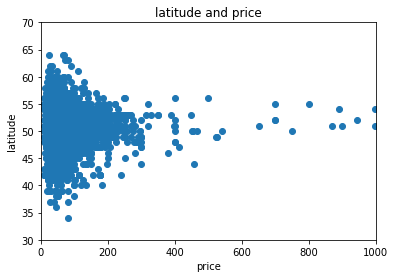

In [72]:
create_plt_scatter( X_test['price'],X_test['latitude'],[0,1000, 30,70],"latitude and price","latitude","price")

**Answer 1:-** Yes, If more we go north, the lower price and Hotel Count.

#### Question 2:- What is expected the price for most commonly used in the far south for every room type?

In [73]:
X_test.head()

,latitude,minimum_nights,availability_365,room_type_Entire_home,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,room_type_nan,price
15376,49,2,0,1,0,0,0,0,90
10404,51,2,168,1,0,0,0,0,174
20026,57,1,179,0,0,1,0,0,33
2043,49,3,0,1,0,0,0,0,55
11508,48,4,0,0,0,1,0,0,48


In [74]:
df_X_where=X_test.query('latitude<= 45')

In [75]:
df_X_where.head()

,latitude,minimum_nights,availability_365,room_type_Entire_home,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,room_type_nan,price
119,44,2,320,1,0,0,0,0,52
7430,43,2,36,0,0,1,0,0,24
3571,40,2,276,0,0,1,0,0,23
4505,44,1,0,1,0,0,0,0,95
15388,43,21,364,1,0,0,0,0,28


In [76]:
# get standard deviation price for every room type
df_X_where[df_X_where['room_type_Entire_home']==1]['price'].std()

54.139040574115405

In [77]:
df_X_where[df_X_where['room_type_Hotel_room']==1]['price'].std()

nan

In [78]:
df_X_where[df_X_where['room_type_Private_room']==1]['price'].std()

30.231309678773144

In [79]:
df_X_where[df_X_where['room_type_Shared_room']==1]['price'].std()

35.0

**Answer 2:-** the expected price for most commonly used in the far south is 61.3 Euro from Entire home and 16.2 Euro from Shared room.

#### Question 3:- Increasing the number of days available per year causes price increases ?

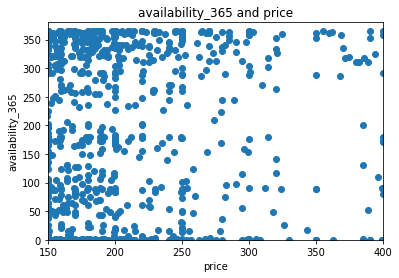

In [80]:
create_plt_scatter( df['price'],df['availability_365'],[150,400, 0,380],"availability_365 and price","availability_365","price")

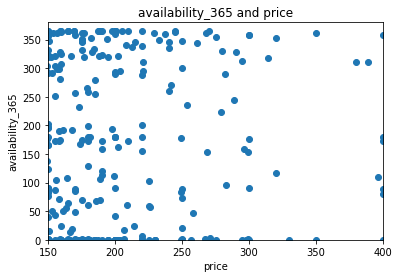

In [81]:
create_plt_scatter( X_test['price'],X_test['availability_365'],[150,400, 0,380],"availability_365 and price","availability_365","price")

**Answer 3:-** Yes, Increasing the number of days available per year causes price increases .

#### Question 4:- when minimum nights is small then the price increases?

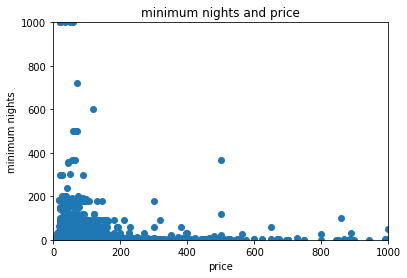

In [82]:
create_plt_scatter(df['price'],df['minimum_nights'],[0,1000, 0,1000],"minimum nights and price","minimum nights","price")

**Answer 4:-**  No, when the minimum nights is small, the price move to decreases.

### Evaluation

-When we go north, the lower price and Hotel Count.

-The expected price for most commonly used in the far south is 61.3 Euro from Entire home and 16.2 Euro from Shared room.

-Increasing the number of days available per year causes price increases .

-Not effect when the minimum nights is small the price not decreases.